In [ ]:
Loan Approval_ML milestone_project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)

In [29]:
df= pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [31]:
for col in df.columns:
    print(repr(col))

'loan_id'
' no_of_dependents'
' education'
' self_employed'
' income_annum'
' loan_amount'
' loan_term'
' cibil_score'
' residential_assets_value'
' commercial_assets_value'
' luxury_assets_value'
' bank_asset_value'
' loan_status'


In [32]:
df.columns = df.columns.str.replace(" ", "")

In [ ]:
# Mapping of categorical values  of education, self_employed and loan_status to Numerical(0/1)

In [34]:
df["education"] = df["education"].str.strip().map({"Graduate":1,"Not Graduate":0})
df["self_employed"] = df["self_employed"].str.strip().map({"Yes":1,"No":0})
df["loan_status"] = df["loan_status"].str.strip().map({"Approved":1,"Rejected":0})
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


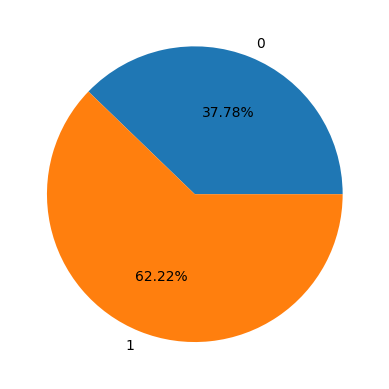

In [35]:
gb = df.groupby("loan_status").agg({"loan_id":"count"})
plt.pie(gb["loan_id"],labels = gb.index,autopct = "%1.2f%%")
plt.show()

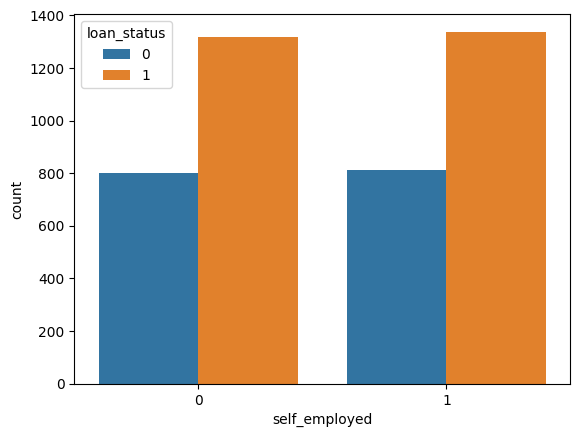

In [38]:
sns.countplot(x  = df["self_employed"], data = df, hue = df["loan_status"])
plt.show()

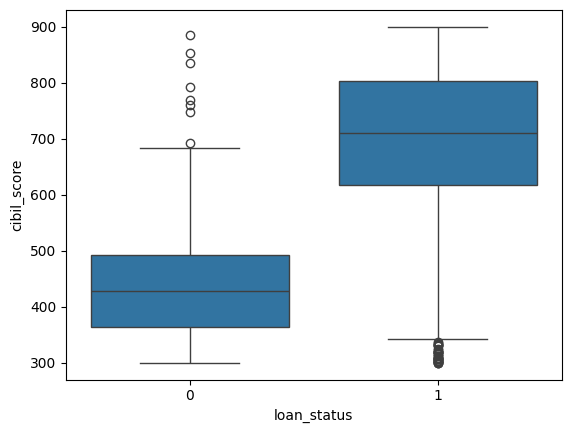

In [40]:
sns.boxplot(data=df, x= "loan_status",y= "cibil_score")
plt.show()

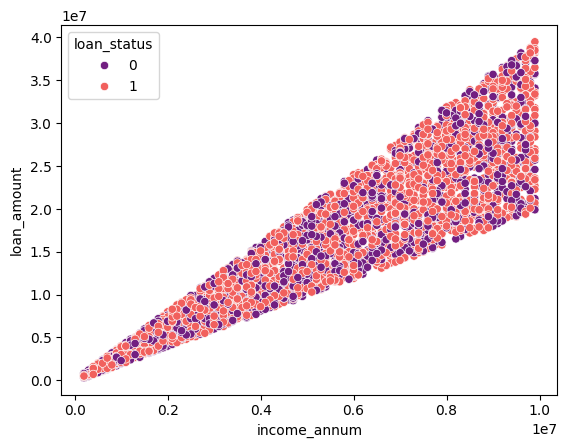

In [42]:
sns.scatterplot(data=df, x= "income_annum", y="loan_amount", hue = "loan_status", palette= "magma")
plt.show()

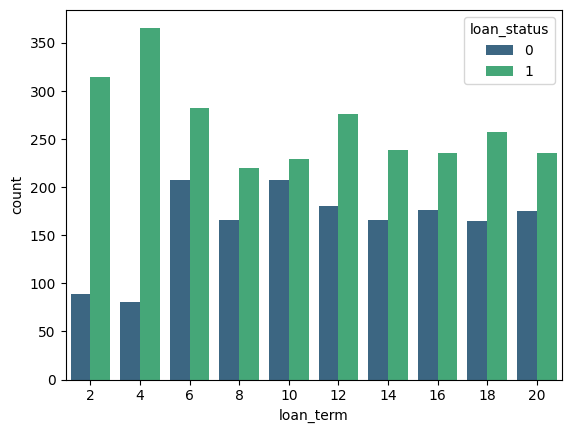

In [44]:
sns.countplot(data = df, x= "loan_term", hue = "loan_status", palette = "viridis")
plt.show()

In [46]:
features = [
    "education","no_of_dependents", "self_employed","income_annum","loan_amount","loan_term","cibil_score","residential_assets_value","commercial_assets_value", "bank_asset_value"
]
X = df[features].copy()
y = df["loan_status"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

In [48]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [49]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [50]:
print("Accuracy :", accuracy_score(y_test, y_pred)) #how many prediction were correct from the total
print("Precision:", precision_score(y_test, y_pred)) #all the positive predictions that models has made, from how many were actually positive
print("Recall   :", recall_score(y_test, y_pred)) #from the actual positives how many were model was able to identify
print("F1-score :", f1_score(y_test, y_pred)) #mean b/w recall and precision. 
print("ROC-AUC  :", roc_auc_score(y_test, y_proba)) # 0 - 1, if towards 1, the model is good. if 0.5 (random guessing)

Accuracy : 0.8009367681498829
Precision: 0.7934959349593496
Recall   : 0.9190207156308852
F1-score : 0.8516579406631762
ROC-AUC  : 0.8830351052106837


# Model Performance Summary

🔹 Accuracy: 0.80
 - The model predicts correctly 80% of the time.

🔹 Precision: 0.79
 - When the model predicts loan approved, it is correct 79% of the time.

🔹 Recall: 0.91
 - The model detects 91% of all actual approved loans.

🔹 F1-Score: 0.85
 - Balanced measure of precision and recall.

🔹 ROC-AUC: 0.88
 - Very good discrimination between approved (1) and rejected (0) customers.

In [51]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[196 127]
 [ 43 488]]


In [56]:
example = [[
    
    1,            # education (0/1)
    2,            # no_of_dependents
    1,            # self_employed (0/1)
    2700000,      # income_annum
    15000000,     # loan_amount
    15,           # loan_term
    650,          # cibil_score
    13500000,     # residential_assets_value
    1200000,      # commercial_assets_value
    1900000       # bank_asset_value
]]
pred_prob = model.predict_proba(example)[0, 1]
pred_class = model.predict(example)[0]

print("Predicted approval probability:", pred_prob)
print("Predicted class (1=Approved, 0= Rejected):", pred_class)

Predicted approval probability: 0.8647352492168883
Predicted class (1=Approved, 0= Rejected): 1


C:\Users\Girish Poojary\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Girish Poojary\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Executive Summary

 - Overall system achieved strong predictive performance. With an accuracy of 80% and ROC-AUC of 0.88, the model demonstrates good ability to distinguish between high-risk and low-risk applicants.
 - The analysis reveals that CIBIL score, income, asset values, and loan-to-income ratio are the strongest indicators of loan approval. 
 - Higher CIBIL scores particularly correlate with a significantly higher approval probability, confirming their importance in credit risk evaluation.
 - The model is effective at identifying applicants who are genuinely eligible for loans, achieving a recall of 91%, meaning most good borrowers are accurately approved. 

Overall, the model offers a reliable, data-driven decision-support tool that can improve approval consistency, reduce manual workload, and help minimize credit risk for financial institutions.


# Key Insights


🔹 1. CIBIL Score is the Most Influential Factor
    Approved applicants show median CIBIL scores around 700+, while rejected applicants cluster near 400–450.

🔹 2. Higher Income and Higher Asset Values Increase Approval Odds
    Scatterplots indicate that applicants with higher annual income and higher residential or commercial asset values have a greater probability of approval.

🔹 3. Loan Term and Dependents Have Moderate Influence
    Shorter loan terms correlate with slightly higher approval rates.
    Applicants with fewer dependents show higher approval probability due to lower financial burden.

🔹 4. Model Performance is Strong but Can Improve Precision

 -  Confusion Matrix:

 [[196 127]
 
 [ 43 488]]


 - True Positives (488): Approved applicants correctly identified.

 - True Negatives (196): Rejected applicants correctly identified.

 - False Positives (127): Risky applicants incorrectly approved.

 - False Negatives (43): Eligible applicants incorrectly rejected.

# Executive Recommendations

✔ 1. Use model for preliminary loan screening
     - High recall ensures that most legitimate borrowers are not rejected prematurely.

✔ 2. Strengthen rules for borderline approval cases
      - Use additional checks for applicants flagged near the decision threshold (0.5–0.7 probability).

✔ 3. Retrain model with more features
     - Adding debt-to-income ratio, employment history, and past default behavior can reduce false approvals.